In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [2]:
!python3 --version


Python 3.7.6


In [3]:
# Importing the csv file into a pandas dataframe

os.chdir("/home/edu/Public/sharkAttacks")
os.getcwd()

df = pd.read_csv("input/GSAF5.csv", encoding = "ISO-8859-1")

# Saving a copy of the original df in order to not have to re-read the csv if we want to undo a change.
dfBackup = df

# Let's get an idea of how the dataframe looks like.
display(df.head())


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
# Examining the size of the dataframe: 24 columns, 5992 rows/entries
display(df.columns)
display(df.shape)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

(5992, 24)

In [5]:
# We can check the types of variables we are dealing with
# We can see that there are multiple columns where the type of data does not match the variable type
# Age is not an int, Fatal is not a bolean, so this is something we can clean up.

df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [6]:
# Checking the amount of nulls in the whole dataframe

for col, numnulls in df.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")

Country 43
Area 402
Location 496
Activity 527
Name 200
Sex  567
Age 2681
Injury 27
Fatal (Y/N) 19
Time 3213
Species  2934
Investigator or Source 15
href formula 1
href 3
Unnamed: 22 5991
Unnamed: 23 5990


In [7]:
# I noticed two columns without a label and a high number of null values: 
# "Unnamed: 22" and "Unnamed: 23". We can see if they contain any values.

un22 = df["Unnamed: 22"]
display(df["Unnamed: 22"].head(10))
display(df[un22.notnull()])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Unnamed: 22, dtype: object

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN


In [8]:
un23 = df["Unnamed: 23"]
display(df["Unnamed: 23"].head(10))
display(df[un23.notnull()])

# Neither column seems to contain data that can be used.

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Unnamed: 23, dtype: object

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [9]:
# We can drop them instead.

df2 = df # Backup in case
df3 = df2.drop("Unnamed: 22", axis = 1) 
df3.head()
df4 = df3.drop(columns = "Unnamed: 23") # Different syntax with same functionality
df4.head()

# Now that we have verified that we removed the correct columns, 
# we overwrite the df we are working with with our changes.
df = df4


In [10]:
# Data cleaning: there seems to be two columns with links to pdfs with details of each incident. 
# If we were interested in removing one of them, we could check whether the content is the same between them.

# We can see try to eyeball a couple of rows like this.
print(df["href formula"][0])
print(df["href"][0])
df["href formula"][0] == df["href"][0]

# But it would be better to make a counter that checks how often there is
# a discrepancy between the two columns as follows:

discr = 0
for i in range(len(df["href formula"])):
    if not df["href formula"][i] == df["href"][i]:
        discr += 1
        # The following is commented out for readibility, remove the comment to see the 54 mismatches
        #print(df["href formula"][i], "|||||", df["href"][i]) 


http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf


In [11]:
print("Total mismatches",discr)

Total mismatches 54


## Group by country

An obvious line of analysis would be to look at shark incidents per country, continent or region. To do that, we can first try to get the amount of shark attacks in each country.

In [44]:
countryCnt = df.groupby('Country')['Country']
countryCnt.count()

pd.set_option('display.max_rows', 6000) # Enable this in order to be able to see all rows
# pd.set_option('display.max_columns', 500)

pd.set_option('display.max_row', 25) # We reset it after for readibility

# After the groupby, we can sort the values in descending order, and only show the top 20 country in order to get the country-counts that show up most frequently in the dataset.

top20countries = countryCnt.size().sort_values(ascending = False).head(20)


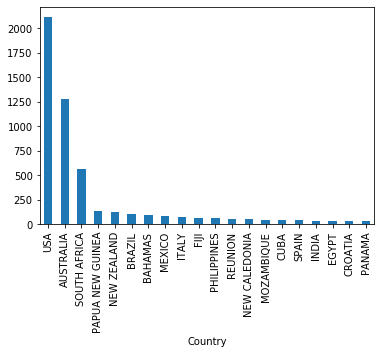

In [14]:
# We can get a simple graphical output of the countries with most reports
display(top20countries.plot.bar())

An interesting question would be to see if shark attacks correlate with population. We expect more populous countries to have more shark attacks.
To do this, we import a table with countries and population we found online.

In [33]:
# Attempt one: had some troubles with the columns on this one
dfCountryP = pd.read_csv("input/populationPerCountry.csv", sep = '\t')
display(dfCountryP.head())
dfCountryP.columns

,,,,,,,,,,# Country Population,Yearly Change Net Change Density (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate Med. Age Urban Pop % World Share
1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


Index(['#   Country Population', 'Yearly Change   Net Change  Density (P/Km²) Land Area (Km²) Migrants (net)  Fert. Rate  Med. Age    Urban Pop % World Share '], dtype='object')

In [35]:
# Attempt 2: instead we use a dataset that comes in a csv, and that we can edit more easily
dfCP = pd.read_csv("input/populationPerCountry2.csv")
dfCP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421e+04,5.544e+04,5.622e+04,5.670e+04,5.703e+04,5.736e+04,...,1.017e+05,1.020e+05,1.026e+05,1.032e+05,1.038e+05,1.043e+05,1.049e+05,1.054e+05,1.058e+05,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.997e+06,9.169e+06,9.351e+06,9.543e+06,9.745e+06,9.956e+06,...,2.919e+07,3.012e+07,3.116e+07,3.227e+07,3.337e+07,3.441e+07,3.538e+07,3.630e+07,3.717e+07,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5.455e+06,5.531e+06,5.609e+06,5.679e+06,5.735e+06,5.771e+06,...,2.336e+07,2.422e+07,2.511e+07,2.602e+07,2.694e+07,2.788e+07,2.884e+07,2.982e+07,3.081e+07,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1.609e+06,1.660e+06,1.711e+06,1.763e+06,1.814e+06,1.865e+06,...,2.913e+06,2.905e+06,2.900e+06,2.895e+06,2.889e+06,2.881e+06,2.876e+06,2.873e+06,2.866e+06,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341e+04,1.438e+04,1.537e+04,1.641e+04,1.747e+04,1.855e+04,...,8.445e+04,8.375e+04,8.243e+04,8.077e+04,7.921e+04,7.801e+04,7.730e+04,7.700e+04,7.701e+04,NaN


For now, we are only interested in country name and population. We can make a dataframe with just that data.  
For ease of use, let us only use 2018 data for population. We can consider stratifying by year later on.

In [36]:
dfCP.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [57]:
dfC2018 = dfCP[['Country Name','2018']] # We select the data only from 2018, along with the country names.
dfC2018 = dfC2018.rename(columns = {'Country Name':'Country', '2018':'population'}) # We give 2018 a more descriptive name, and we rename 'Country name' to 'Country' to match the shark data.
dfC2018.head()

,Country,population
0,Aruba,1.058e+05
1,Afghanistan,3.717e+07
2,Angola,3.081e+07
3,Albania,2.866e+06
4,Andorra,7.701e+04


In [59]:
dfJoined = pd.merge(df, dfC2018, on = 'Country')
dfJoined

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,population
0,2016.03.10,10-Mar-16,2016,Unprovoked,Fiji,Vanua Levu,NaN,Diving for beche-de-mer,Maika Tabua,M,...,Afternoon,NaN,"Fiji Sun, 3/12/2016",2016.03.10-Tabua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.03.10,2016.03.10,5910,8.835e+05
1,1988.02.02,02-Feb-88,1988,Unprovoked,Fiji,Vanua Levu,NaN,Diving,Qalo Moceyawa,M,...,NaN,"Tiger shark, 3 m","Sun, 2/5/1988, p.15",1988.02.02-Fiji-Moceyawa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.02.02,1988.02.02,3468,8.835e+05
2,1872.01.28,28-Jan-1872,1872,Invalid,Fiji,Lomaiviti Provine,"Levuka Point, Ovalau Island",boat capsized,Mr. Manning,M,...,dusk,NaN,"Empire, 2/20/1872",1872.01.28-Manning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1872.01.28,1872.01.28,348,8.835e+05
3,2006.03.28.R,Reported 28-Mar-2006,2006,Unprovoked,Sierra Leone,Western Area,"Lumely Beach, Freetown",Fishing,4 fishermen,M,...,NaN,"3 m, 600-kg shark",Reuters,2006.03.28.R-SierraLeone.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.03.28.R,2006.03.28.R,4724,7.650e+06
4,2005.08.01,01-Aug-05,2005,Invalid,Seychelles,Inner Islands,Off North Island,Fishing,Rolly Lesperance,M,...,NaN,Bull shark,D. Rowat,2005.08.01-Lesperance.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.08.01,2005.08.01,4654,9.676e+04


In [ ]:
dfJoin